# 总览

matplotlib 是绘图库，接受可迭代对象，绘制出相应的曲线、散点、直方图……等等。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

## 基本概念

matplotlib 的 Python 接口位于 `matplotlib.pyplot` 模块中，一般导入为 `plt` 别名， matplotlib 本身常被简写为 mpl。一个 matplotlib 图形可以大致分为三个层次：

1. figure
2. axes
3. line, text, image 等

figure 直译是 “图形”，但我更愿意称呼它为 “画布”，是所有 mpl 图形的背景；axes 是轴域，为画布上划分出来的一块区域，并且默认自带一个显示的坐标轴图形；而其他元素则应当在 axes 或 figure 之上进行绘制。axes 本身只是一片区域，它自带的坐标轴应当属于第三层。

![mpl 图形层次示意图](image/overview-1.png)

一张图有以上要素：

- 作为画布的 Figure
- 显示在画布内上方的 title（属于 Figure，Axes 也可以有 title，显示在轴域内的上方）
- 作为作图区域的轴域 Axes
- 轴域的边框（坐标轴）
- 轴域坐标轴上的刻度 ticks，分 xticks 和 yticks（属于 Axes）
- 轴域坐标轴的标签 label，分 xlabel, ylabel。一般用于声明此轴表示什么量
- 轴域内的图形，例如一个曲线 `Line2D` 对象

可以使用 `plt.figure` 函数来创建一个新的 Figure 对象，同时通过传入一些参数，来控制 Figure 的属性：

```python
plt.figure(
    num=None,
    figsize=None,
    dpi=None,
    facecolor=None,
    edgecolor=None,
    frameon=True,
    FigureClass=<class 'matplotlib.figure.Figure'>,
    clear=False,
    **kwargs,
)
```

- `num`(`int`,`string`,`None`): 该图像的标识符，如果为 None，则创建一个新的，并且 id 自增 1。如果传入整数，则返回指向对应 id 的图像的引用，如果不存在会新建，同时 id 赋值为此参数。如果为字符串，除了与整数类似但 id 为自增之外，图像的 title 会被设置为传入值。
- `figsize`(`(float,float)`): 传入一对数字组成的元组，设置此图像的宽、高，单位为英寸（inch:meter = 1:0.0254 = 39.37:1）。默认为 `(6.4, 4.8)`。
- `dpi`(`int`): 设置图像分辨率，单位为像素每英寸（一维尺度上像素数目），默认 100。对于网络图像， 72 dpi 为一个较合适的值，对于印刷品，则在 300 dpi 以上才算清晰的图像。
- `clear`(`bool`): 如果设置为 True，则会对应 num 的图像已经存在时将其清空。

其他的参数并不常用，需要用到时再提。

由于 mpl 是为印刷级图像设计的，因此 `figsize` 和 `dpi` 两个相关的参数共同决定了该图像文件的像素总数，例如默认情况下的像素数目为

$$
(6.4, 4.8) * 100 = (640, 480) = 307200
$$

## 绘图示例

在绘图时，我们一般需要经历获取 Figure 实例，在 Figure 实例上创建 Axes 实例，在 Axes 内画图，这三个步骤。

In [3]:
# 获取 figure 实例
canvas = plt.figure(0, clear=True)

<Figure size 432x288 with 0 Axes>

In [4]:
# 分配轴域
axes0 = canvas.add_subplot()

In [5]:
axes0

In [6]:
canvas.axes

如上所示，可以通过 `add_subplot` 方法从 Figure 内分配一块区域为轴域，默认情况下分配 `1, 1, 1` 号位置。
所谓的 `1,1,1` 号位置可以先理解为 “全部”，具体情况参考 *网格状布局* 章节。

In [7]:
# 构造数据并在轴域内画图
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
axes0.plot(x, y)

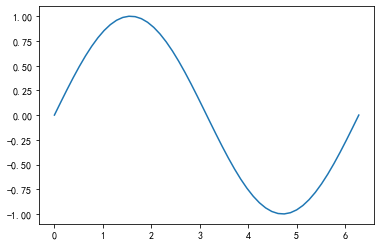

In [8]:
canvas

matplotlib 为以上常用操作提供了快捷方式，例如当我们调用 `plt.plot` 时，就会自动创建一个图像、轴域，并且在其上绘制等等。
快捷方式虽然方便，但是对于初学者来说，很容易与各种概念发生混淆，因此本教程不会使用这些快捷方式，而是全程手动控制。

## 各种图样

matplotlib 提供了散点图、曲线图、直方图、

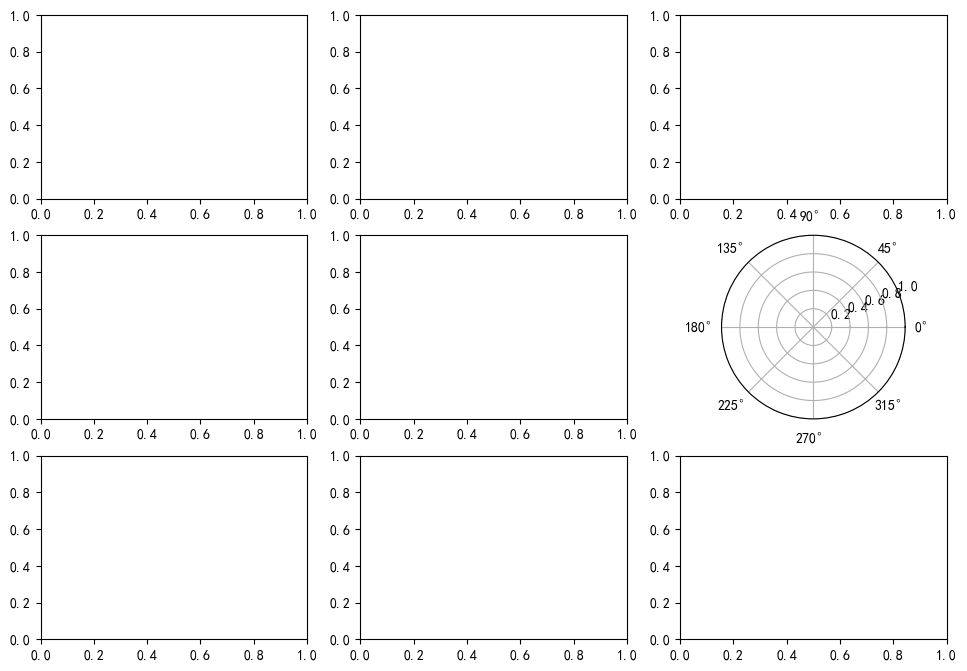

In [9]:
# 新建一块画布，为每一种图例分配轴域
# A4 纸张大小
canvas1 = plt.figure(1, figsize=(11.69, 8.27), dpi=100, clear=True)
# 散点图
ax_scatter = canvas1.add_subplot(3, 3, 1)
# 曲线图
ax_plot = canvas1.add_subplot(3, 3, 2)
# 
ax_boxplot = canvas1.add_subplot(3, 3, 3)
# 柱形图
ax_bar = canvas1.add_subplot(3, 3, 4)
#
ax_barh = canvas1.add_subplot(3, 3, 5)
# 极坐标, 在创建轴域时进行设置
ax_polar = canvas1.add_subplot(3, 3, 6, polar=True)
# 饼图
ax_pie = canvas1.add_subplot(3, 3, 7)
# XY 相关性系数
ax_cohere = canvas1.add_subplot(3, 3, 8)
# 直方图
ax_hist = canvas1.add_subplot(3, 3, 9)

In [10]:
# scatter 方法接受两个数组，分别是要绘制的点的 x，y 坐标组成的数组
x = np.random.random(100)
y = np.random.random(100)
ax_scatter.scatter(x, y)
# 设置标题
ax_scatter.set_title("scatter");

In [11]:
# plot 方法接受两个数组，分别是要绘制曲线的各样本点 x，y 坐标组成的数组
# 注意点之间的连接顺序取决于 x，y 数组的顺序
x = np.linspace(0, 2)
y = np.sqrt(x)
ax_plot.plot(x, y)
ax_plot.set_title("plot");

In [12]:
# boxplot 是箱形图，一般常用于股票行情等情况的绘制
# 需要传入二维数组，会显示二维数组中每一个一维数组的最大值、最小值、范围的四分之三、范围的四分之一、中位数等信息
x = np.random.random((100, 4))
ax_boxplot.boxplot(x)
ax_boxplot.set_title("boxplot");

In [13]:
# bar 是条形图，或者称柱形图
x = np.random.random(4)
ax_bar.bar([1, 2, 3, 4], x)
ax_bar.set_title("bar");

In [14]:
# barh 平行条形图
ax_barh.barh([1, 2, 3, 4], x)
ax_barh.set_title("barh");

In [15]:
# polar 会将原本的直角坐标系更改为极坐标系
# 绘制时依然调用原本直角坐标系下可以使用的函数，如 plot、bar 等
# 一个轴域是否为极坐标，是需要在创建此轴域时就通过参数确定的
x = np.linspace(0, 2*np.pi)
y = np.cos(x)
ax_polar.plot(x, y)
ax_polar.set_title("polar");

In [16]:
# pie 饼图，用来显示各个部分相对总体的占比
data = [0.25, 0.25, 0.50]
ax_pie.pie(data, labels=["25%", "25%", "50%"])
ax_pie.set_title("pie");

In [17]:
# cohere 是 XY 的相关性系数图
# 计算公式为 
# $$
# C_{xy} = \frac{|P_{xy}|^2}{P_{xx}P{yy}}
# $$
x = np.linspace(0, 256, 256*20)
y = np.sin(x) + 3*np.sin(2*x) + 5*np.sin(3*x) + 7*np.sin(5*x)
ax_cohere.cohere(x, y)
ax_cohere.set_title("cohere");

In [18]:
# hist 直方图
# 输入二维数组，其中每一个一维数组的长度不需要相同
data = np.random.random((100, 10))
ax_hist.hist(data)
ax_hist.set_title("hist");

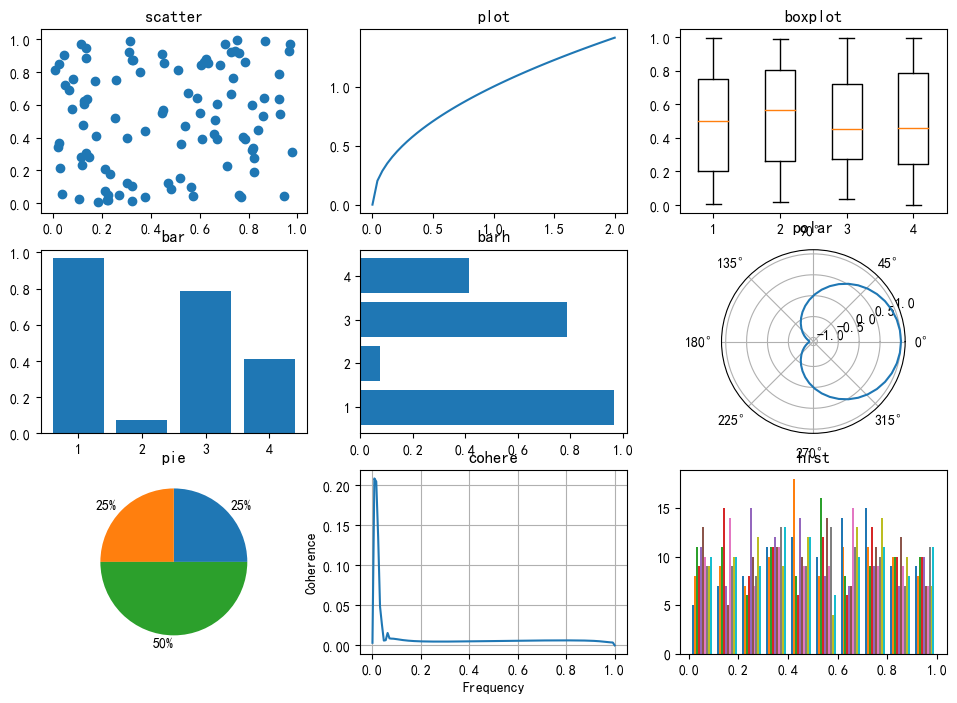

In [19]:
canvas1
# 各图例如下所示

## 保存图像

在作图完成后，可以对 Figure 对象调用 `savefig` 方法将图像内容保存下来，并且可以指定图像保存格式，例如保存为 svg 或 pdf 矢量图。
matplotlib 提供了相关的后端。

不过在打算保存矢量图时，不要在创建 Figure 对象时指定 `dpi` 参数，这会导致 figure 以位图形式绘制图像，就算保存为矢量图，也没有矢量图的性质，而是以矢量图中嵌入位图的形式保存的。

In [20]:
canvas.savefig("var/xx1.svg", format="svg")

In [21]:
canvas1.savefig("var/xx1.pdf", format="pdf")

## matploblib 画廊

https://matplotlib.org/gallery.html 有各种图像的示例与代码，如果感兴趣可以去浏览一番。